<a href="https://colab.research.google.com/github/atikhasan007/Scikit-learn/blob/main/1111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import numpy as np
import albumentations as A
from torch.utils.data import Dataset



In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ktncktnc/s2looking")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/s2looking


In [4]:
import os

base_path = '/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242'

# S2Looking folder-এর ভিতরে কি আছে
s2_path = os.path.join(base_path, 'S2Looking')
print("S2Looking contents:", os.listdir(s2_path))

# LEVIR-CD+ folder-এর ভিতরে কি আছে
levir_path = os.path.join(base_path, 'LEVIR-CD+')
print("LEVIR-CD+ contents:", os.listdir(levir_path))


S2Looking contents: ['S2Looking', '__MACOSX']
LEVIR-CD+ contents: ['LEVIR-CD+', '__MACOSX']


In [5]:
import os
import random
from sklearn.model_selection import train_test_split

# =============================
# 🔹 Dataset Base Path
# =============================
base_path = '/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242'

# =============================
# 🔹 Helper Function: Get All Images Recursively
# =============================
def get_all_images(folder):
    image_paths = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
                image_paths.append(os.path.join(root, file))
    return sorted(image_paths)

# =============================
# 🔹 Make Pairs (Self-Pairing)
# =============================
def make_pairs_from_folder(folder):
    images = get_all_images(folder)
    pairs = [(img, img) for img in images]  # self-pairing for change detection input
    return pairs

# =============================
# 🔹 S2Looking & LEVIR-CD+ Folders
# =============================
s2_folder = os.path.join(base_path, 'S2Looking', 'S2Looking')
levir_folder = os.path.join(base_path, 'LEVIR-CD+', 'LEVIR-CD+')

# =============================
# 🔹 Create Pairs
# =============================
s2_pairs = make_pairs_from_folder(s2_folder)
levir_pairs = make_pairs_from_folder(levir_folder)

# =============================
# 🔹 Merge & Shuffle
# =============================
all_pairs = s2_pairs + levir_pairs
random.shuffle(all_pairs)

# =============================
# 🔹 Split: 70% train, 15% val, 15% test
# =============================
train_pairs, temp_pairs = train_test_split(all_pairs, test_size=0.3, random_state=42)
val_pairs, test_pairs  = train_test_split(temp_pairs, test_size=0.5, random_state=42)

# =============================
# 🔹 Print Dataset Sizes
# =============================
print(f"Total Pairs: {len(all_pairs)}")
print(f"Train Pairs: {len(train_pairs)}")
print(f"Validation Pairs: {len(val_pairs)}")
print(f"Test Pairs: {len(test_pairs)}")

# =============================
# 🔹 Example: First 5 Train Pairs
# =============================
print("First 5 Train Pairs:")
for p in train_pairs[:5]:
    print(p)


Total Pairs: 27955
Train Pairs: 19568
Validation Pairs: 4193
Test Pairs: 4194
First 5 Train Pairs:
('/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242/S2Looking/S2Looking/train/label/299.png', '/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242/S2Looking/S2Looking/train/label/299.png')
('/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242/S2Looking/S2Looking/train/Image2/2083.png', '/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242/S2Looking/S2Looking/train/Image2/2083.png')
('/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242/S2Looking/S2Looking/test/label1/4579.png', '/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242/S2Looking/S2Looking/test/label1/4579.png')
('/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242/S2Looking/S2Looking/train/label2/2328.png', '/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242/S2Looking/S2Looking/train/label2/2328.png')
('/root/.cache/kagglehu

=== Dataset Sizes ===
Total Images: 27955
Train: 19568
Validation: 4193
Test: 4194

=== Train Folder Distribution ===
label: 4180
Image2: 3504
label1: 3461
label2: 3506
Image1: 3528
A: 693
B: 696

=== Validation Folder Distribution ===
label1: 783
Image1: 698
label: 910
B: 146
Image2: 759
label2: 750
A: 147

=== Test Folder Distribution ===
label2: 744
label: 895
label1: 756
A: 145
Image2: 737
B: 143
Image1: 774

=== Random Train Samples ===


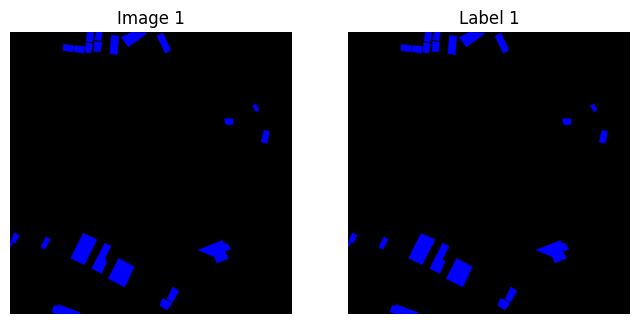

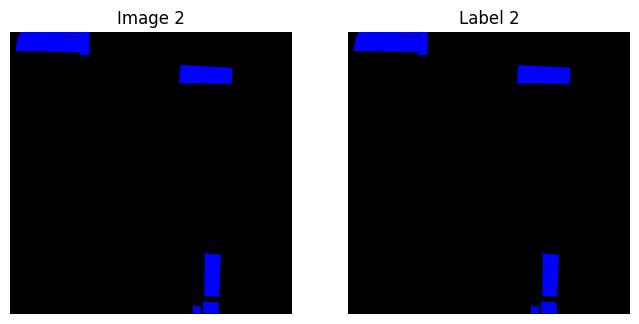

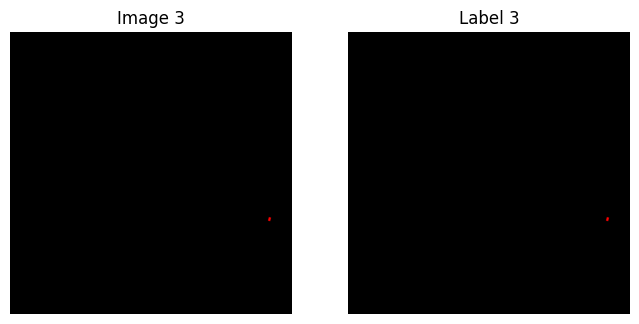

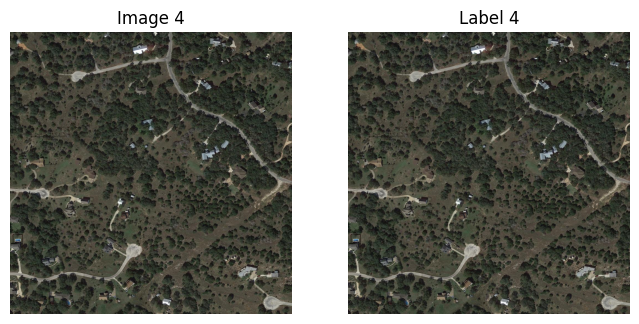

In [6]:
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
import random
import os

# =============================
# 🔹 Dataset Stats
# =============================
print("=== Dataset Sizes ===")
print(f"Total Images: {len(all_pairs)}")
print(f"Train: {len(train_pairs)}")
print(f"Validation: {len(val_pairs)}")
print(f"Test: {len(test_pairs)}")

# =============================
# 🔹 Count Images per Subfolder
# =============================
def count_images_per_subfolder(pairs):
    folder_count = {}
    for img1, _ in pairs:
        folder = os.path.basename(os.path.dirname(img1))
        if folder not in folder_count:
            folder_count[folder] = 0
        folder_count[folder] += 1
    return folder_count

train_folder_count = count_images_per_subfolder(train_pairs)
val_folder_count   = count_images_per_subfolder(val_pairs)
test_folder_count  = count_images_per_subfolder(test_pairs)

print("\n=== Train Folder Distribution ===")
for k, v in train_folder_count.items():
    print(f"{k}: {v}")

print("\n=== Validation Folder Distribution ===")
for k, v in val_folder_count.items():
    print(f"{k}: {v}")

print("\n=== Test Folder Distribution ===")
for k, v in test_folder_count.items():
    print(f"{k}: {v}")

# =============================
# 🔹 Visualize Random Samples
# =============================
def show_random_samples(pairs, num_samples=5):
    samples = random.sample(pairs, num_samples)
    for i, (img_path, label_path) in enumerate(samples):
        try:
            img = Image.open(img_path)
            label = Image.open(label_path)
            plt.figure(figsize=(8,4))
            plt.subplot(1,2,1)
            plt.imshow(img)
            plt.title(f"Image {i+1}")
            plt.axis('off')
            plt.subplot(1,2,2)
            plt.imshow(label)
            plt.title(f"Label {i+1}")
            plt.axis('off')
            plt.show()
        except UnidentifiedImageError:
            print(f"Warning: Could not identify image file: {img_path}. Skipping.")
        except FileNotFoundError:
             print(f"Warning: File not found: {img_path}. Skipping.")


print("\n=== Random Train Samples ===")
show_random_samples(train_pairs)

In [7]:
# =========================================
# 1️⃣ Libraries
# =========================================
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, BatchNormalization, Activation, Multiply, Add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import random

In [8]:
# =========================================
# 2️⃣ Dataset Paths
# =========================================
base_path = '/root/.cache/kagglehub/datasets/ktncktnc/s2looking/versions/1242'

# Nested folders
s2looking_folder = os.path.join(base_path, 'S2Looking', 'S2Looking')
levir_folder     = os.path.join(base_path, 'LEVIR-CD+', 'LEVIR-CD+')

input_shape = (256, 256)


In [9]:

# =========================================
# 3️⃣ Helper: Get all images recursively
# =========================================
def get_images(folder):
    images = []
    for root, dirs, files in os.walk(folder):
        for f in files:
            if f.lower().endswith(('.png','.jpg','.jpeg')):
                images.append(os.path.join(root,f))
    return sorted(images)

# =========================================
# 4️⃣ Load and match images with masks
# =========================================
def load_pairs(folder):
    images1 = get_images(folder)
    images2 = get_images(folder)
    # Self-pairing, mask = same as image for now
    pairs = [(i1,i2) for i1,i2 in zip(images1,images2)]
    return pairs

all_pairs = load_pairs(s2looking_folder) + load_pairs(levir_folder)
random.shuffle(all_pairs)


In [10]:

# =========================================
# 5️⃣ Split
# =========================================
train_pairs, temp_pairs = train_test_split(all_pairs, test_size=0.3, random_state=42)
val_pairs, test_pairs  = train_test_split(temp_pairs, test_size=0.5, random_state=42)

print(f"Train: {len(train_pairs)}, Val: {len(val_pairs)}, Test: {len(test_pairs)}")

Train: 19568, Val: 4193, Test: 4194


In [12]:
# =========================================
# 6️⃣ Generator to Load Images & Masks Batch-wise
# =========================================
import numpy as np
import cv2
import random

def data_generator(pairs, batch_size=8, input_shape=(256,256)):
    """
    Generator to load images & masks in batches.
    pairs: list of (img1_path, img2_path)
    batch_size: number of samples per batch
    input_shape: target image size (height, width)
    """
    while True:
        random.shuffle(pairs)
        for i in range(0, len(pairs), batch_size):
            batch_pairs = pairs[i:i+batch_size]
            X_batch, y_batch = [], []
            for img1_path, img2_path in batch_pairs:
                img1 = cv2.imread(img1_path)
                img2 = cv2.imread(img2_path)
                if img1 is None or img2 is None:
                    continue
                img1 = cv2.resize(img1, input_shape)/255.0
                img2 = cv2.resize(img2, input_shape)/255.0

                # Mask path
                mask_path = img1_path.replace('Image1','label') if 'Image1' in img1_path else img1_path
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                if mask is None:
                    mask = np.zeros(input_shape)
                else:
                    mask = cv2.resize(mask, input_shape)/255.0

                X_batch.append(np.concatenate([img1,img2], axis=-1))
                y_batch.append(mask[..., np.newaxis])

            if X_batch and y_batch:
                yield np.array(X_batch), np.array(y_batch)

# =========================================
# 7️⃣ Create Generators
# =========================================
batch_size = 8
train_gen = data_generator(train_pairs, batch_size=batch_size, input_shape=input_shape)
val_gen   = data_generator(val_pairs, batch_size=batch_size, input_shape=input_shape)

steps_per_epoch = len(train_pairs)//batch_size
validation_steps = len(val_pairs)//batch_size

print(f"Steps per epoch: {steps_per_epoch}, Validation steps: {validation_steps}")

# Removed model.fit from here

Steps per epoch: 2446, Validation steps: 524


In [13]:
# =========================================
# 7️⃣ Attention Block
# =========================================
def attention_block(x, g, inter_channel):
    theta_x = Conv2D(inter_channel, (1,1), padding='same')(x)
    phi_g   = Conv2D(inter_channel, (1,1), padding='same')(g)
    add_xg  = Add()([theta_x, phi_g])
    act_xg  = Activation('relu')(add_xg)
    psi     = Conv2D(1, (1,1), padding='same', activation='sigmoid')(act_xg)
    return Multiply()([x, psi])

# =========================================
# 8️⃣ Novel UNet with Dual-Stream + Attention
# =========================================
def build_novel_unet(input_size=(256,256,6)):
    inputs = Input(input_size)
    im1 = inputs[..., :3]
    im2 = inputs[..., 3:]

    def encoder(x, filters):
        c = Conv2D(filters,3,padding='same',activation='relu')(x)
        c = BatchNormalization()(c)
        c = Conv2D(filters,3,padding='same',activation='relu')(c)
        c = BatchNormalization()(c)
        p = MaxPooling2D((2,2))(c)
        return c, p

    # Encoder
    c1_1,p1_1 = encoder(im1,64)
    c2_1,p2_1 = encoder(p1_1,128)
    c3_1,p3_1 = encoder(p2_1,256)

    c1_2,p1_2 = encoder(im2,64)
    c2_2,p2_2 = encoder(p1_2,128)
    c3_2,p3_2 = encoder(p2_2,256)

    # Bottleneck
    b1 = Conv2D(512,3,padding='same',activation='relu')(p3_1)
    b1 = BatchNormalization()(b1)
    b1 = Conv2D(512,3,padding='same',activation='relu')(b1)
    b1 = BatchNormalization()(b1)

    b2 = Conv2D(512,3,padding='same',activation='relu')(p3_2)
    b2 = BatchNormalization()(b2)
    b2 = Conv2D(512,3,padding='same',activation='relu')(b2)
    b2 = BatchNormalization()(b2)

    b = concatenate([b1,b2])

    # Decoder
    def decoder(x, skip1, skip2, filters):
        u = Conv2DTranspose(filters,(2,2),strides=(2,2),padding='same')(x)
        s = attention_block(concatenate([skip1, skip2]), u, filters)
        u = concatenate([u,s])
        c = Conv2D(filters,3,padding='same',activation='relu')(u)
        c = BatchNormalization()(c)
        c = Conv2D(filters,3,padding='same',activation='relu')(c)
        c = BatchNormalization()(c)
        return c

    d1 = decoder(b, c3_1, c3_2, 256)
    d2 = decoder(d1, c2_1, c2_2, 128)
    d3 = decoder(d2, c1_1, c1_2, 64)

    outputs = Conv2D(1,(1,1),activation='sigmoid')(d3)
    return Model(inputs, outputs)

# =========================================
# 9️⃣ Compile Model
# =========================================
model = build_novel_unet()
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 6)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (GetItem)           │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ get_item[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 256, 256,  │      1,792 │ get_item_1[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 256, 256,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_8[0][0]  

 Total params: 13,959,492 (53.25 MB)

 Trainable params: 13,950,020 (53.22 MB)

 Non-trainable params: 9,472 (37.00 KB)

In [14]:
# =========================================
# 10️⃣ Callbacks
# =========================================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_novel_model.keras", monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

In [ ]:
# =========================================
# 11️⃣ Train
# =========================================
history = model.fit(train_gen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=25,
                    validation_data=val_gen,
                    validation_steps=validation_steps,
                    callbacks=callbacks)

Epoch 1/25
 323/2446 ━━━━━━━━━━━━━━━━━━━━ 44:58 1s/step - accuracy: 0.6252 - loss: 0.6565

In [ ]:

# =========================================
# 12️⃣ Evaluate & Predict
# =========================================
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

pred_masks = model.predict(X_test)

In [ ]:

# =========================================
# 13️⃣ Overlay Visualization
# =========================================
def visualize_overlay(X, y_true, y_pred_binary, n=5, alpha=0.5):
    for i in range(n):
        fig, axes = plt.subplots(1, 3, figsize=(18,6))

        axes[0].imshow(X[i][...,3:])  # image2
        axes[0].set_title("Image 2")
        axes[0].axis('off')

        overlay_gt = X[i][...,3:].copy()
        overlay_gt[...,0] = np.maximum(overlay_gt[...,0], y_true[i].squeeze()*255)
        axes[1].imshow(overlay_gt)
        axes[1].set_title("Ground Truth Overlay")
        axes[1].axis('off')

        overlay_pred = X[i][...,3:].copy()
        overlay_pred[...,1] = np.maximum(overlay_pred[...,1], y_pred_binary[i].squeeze()*255)
        axes[2].imshow(overlay_pred)
        axes[2].set_title("Predicted Mask Overlay")
        axes[2].axis('off')

        plt.show()

pred_masks_binary = (pred_masks > 0.5).astype(np.uint8)
visualize_overlay(X_test, y_test, pred_masks_binary, n=5)
